# Exploratary Data Analysis



### Goal
- Investigate top-paying roles and skills in the data science industry.
- Use Python to explore a real-live dataset on job postings.
- For job-seekers: use these insights to help find the best job opportunities.

In [2]:
#Importing libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datasets import load_dataset
import ast

#Loading Dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#df['job_posted_date'].dtype  -------------> dtype('<M8[ns]')
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
#type(df['job_skills'][1])    -------------> List


c:\Users\soods\anaconda3\envs\Job_Market_Analysis_DataProfile_2023-24_python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter For US Data Analyst Roles

In [3]:
df_us_da = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [4]:
df_us_da.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
643254,Data Analyst,Lead Healthcare Data Governance Analyst,"Fort Myers, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-03-02 12:03:54,False,False,United States,None,NaN,NaN,Robert Half,[go],{'programming': ['go']}
746927,Data Analyst,Data Analyst,"Fort Meade, MD",via BeBee,Full-time,False,Georgia,2023-12-15 20:55:17,False,False,United States,year,100000.0,NaN,CACI,"[python, c]","{'programming': ['python', 'c']}"
447673,Data Analyst,Customer Retention Data Analyst,"Chicago, IL",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-12-08 14:01:33,False,True,United States,None,NaN,NaN,Lawson Products,"[sql, excel, sap]","{'analyst_tools': ['excel', 'sap'], 'programmi..."
369793,Data Analyst,Payments Data Analyst,"Hyattsville, MD",via Indeed,Full-time,False,"New York, United States",2023-06-23 23:16:58,False,False,United States,None,NaN,NaN,Retail Business Services,"[excel, power bi]","{'analyst_tools': ['excel', 'power bi']}"
390682,Data Analyst,Data Analyst,"Los Angeles, CA",via BeBee,Full-time,False,"California, United States",2023-11-13 18:00:53,False,False,United States,None,NaN,NaN,Salesforce,"[sql, python, snowflake, oracle, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['snow..."
679399,Data Analyst,Data Analyst - Talent Management,"New York, NY",via ZipRecruiter,Full-time,False,"New York, United States",2023-04-26 09:59:54,False,False,United States,None,NaN,NaN,The Forum Group,None,None
542941,Data Analyst,"Data Analyst, Full-Time","Madison, WI",via SimplyHired,Full-time,False,"Illinois, United States",2023-12-22 19:01:24,False,True,United States,None,NaN,NaN,Bend Health,"[python, sql]","{'programming': ['python', 'sql']}"
386833,Data Analyst,Research Data Analyst 1 - 116409,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-06-19 18:00:55,False,False,United States,hour,NaN,28.215,UC San Diego,[matlab],{'programming': ['matlab']}
16578,Data Analyst,Data Analyst,"New York, NY",via LinkedIn,Contractor,False,"New York, United States",2023-03-13 13:00:18,False,False,United States,None,NaN,NaN,The Custom Group of Companies,"[assembly, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
726138,Data Analyst,Data Management Analyst,"Dallas, TX",via BeBee,Full-time,False,"Texas, United States",2023-11-17 21:01:49,True,False,United States,None,NaN,NaN,Ellis Recruiting,"[oracle, flow]","{'cloud': ['oracle'], 'other': ['flow']}"


## Get the count of job posting country wise



In [5]:
df_us_da['job_location'].value_counts().head(10)  #-------------> pandas's Series

job_location
Anywhere           5106
New York, NY       3035
Atlanta, GA        2741
Chicago, IL        2337
Austin, TX         1919
Dallas, TX         1862
Washington, DC     1592
Charlotte, NC      1433
Tampa, FL          1431
Los Angeles, CA    1328
Name: count, dtype: int64

Selecting only top 10 countries with the highest job posting 

In [6]:
df_plot = df_us_da['job_location'].value_counts().head(10).to_frame() #-------------> pandas's DataFrame

## Plotting top 10 countries with highest job posting for Data Analyst role

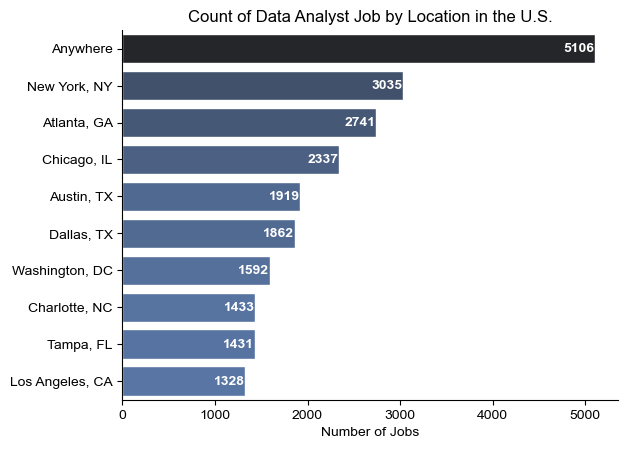

In [7]:
fig ,ax = plt.subplots()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count'  , y= 'job_location' , hue = 'count', palette='dark:b_r', legend='')
sns.despine() #-------------> removes top n right border around the plot
plt.title('Count of Data Analyst Job by Location in the U.S.')
plt.xlabel('Number of Jobs')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Text to annotate
                (p.get_width() - 5, p.get_y() + p.get_height() / 2),  # Position (adjusted slightly)
                ha='right', va='center', color='white', fontsize=10, fontweight='bold')
    

plt.show()


## Plotting Job Opportunities

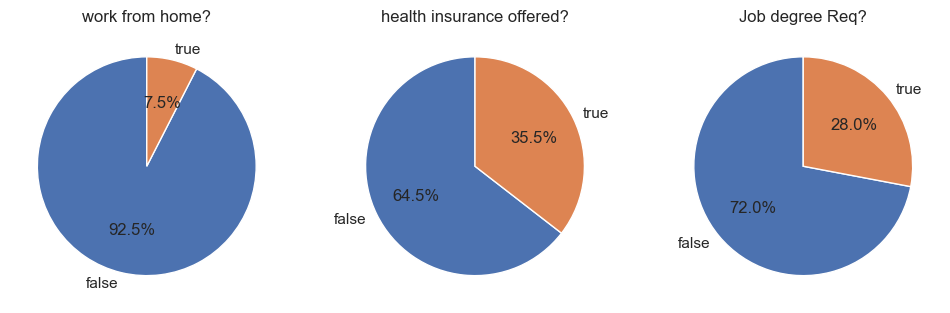

In [8]:
fig , ax = plt.subplots(1,3)

dict_col = {
    'job_work_from_home': 'work from home?',
    'job_health_insurance':'health insurance offered?',
    'job_no_degree_mention':'Job degree Req?'
}

for  i, (col, title)  in enumerate(dict_col.items()):
    ax[i].pie(df_us_da[col].value_counts(), startangle= 90, autopct = '%1.1f%%',labels=['false','true'])
    ax[i].set_title(title)

fig.set_size_inches((12,5))

plt.show()

## Selecting only top 10 Companies with the highest job posting 

In [9]:
df_plot = df_us_da['company_name'].value_counts().head(10).to_frame() #-------------> pandas's DataFrame

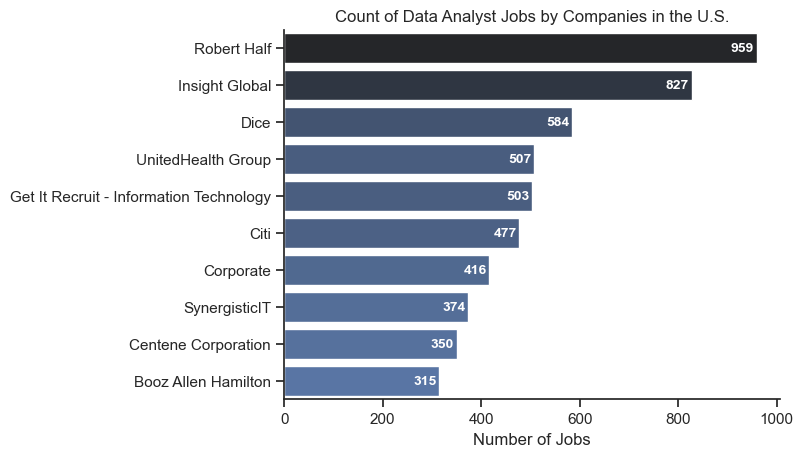

In [10]:
fig ,ax = plt.subplots()

sns.barplot(data = df_plot, x='count'  , y= 'company_name' , hue = 'count', palette='dark:b_r', legend='')
sns.despine() #-------------> removes top n right border around the plot
plt.title('Count of Data Analyst Jobs by Companies in the U.S.')
plt.xlabel('Number of Jobs')
plt.ylabel('')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # Text to annotate
                (p.get_width() - 5, p.get_y() + p.get_height() / 2),  # Position (adjusted slightly)
                ha='right', va='center', color='white', fontsize=10, fontweight='bold')
    
plt.show()